## Teachable Machine
https://teachablemachine.withgoogle.com/
#### 고개를 숙이는지 정면을 바라보는지 판단

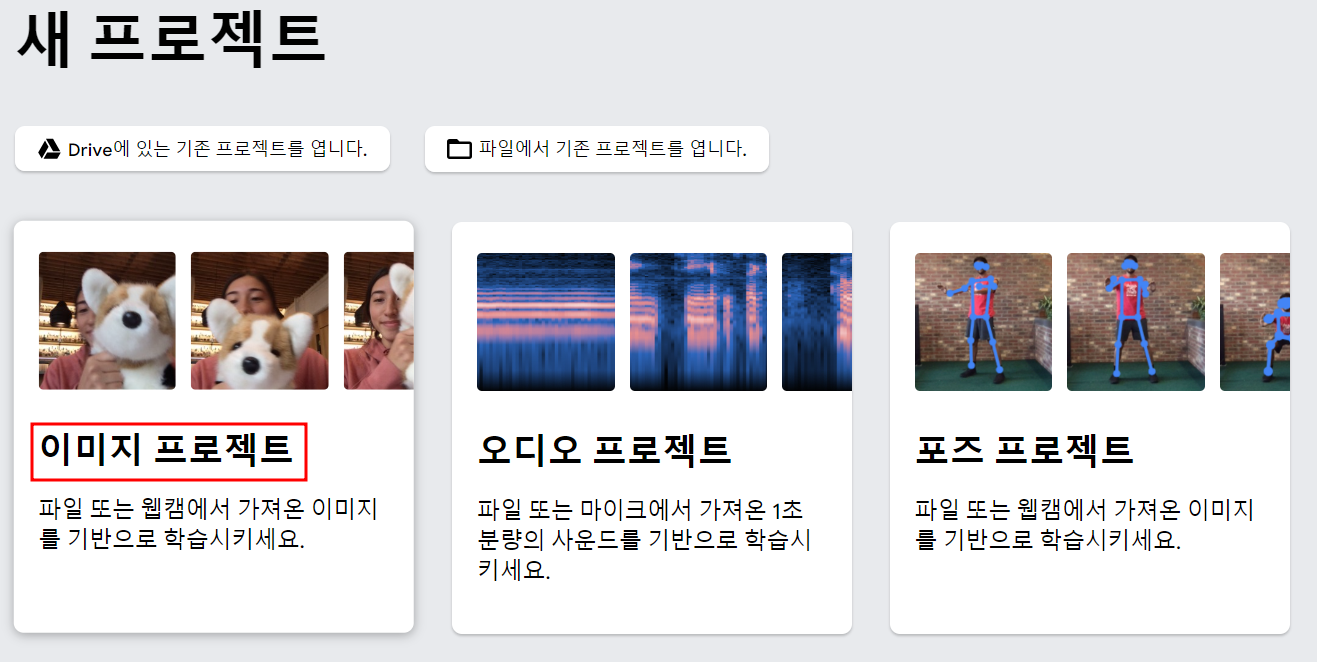  

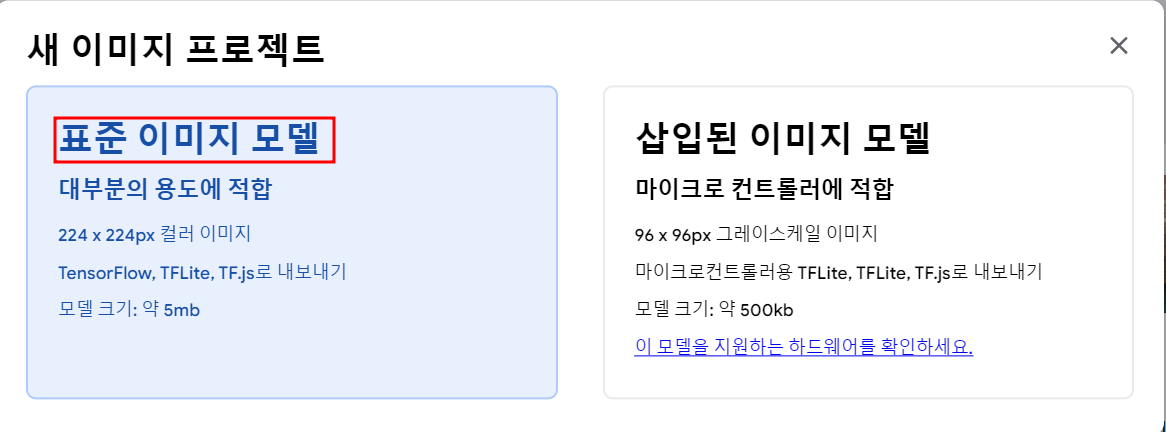  

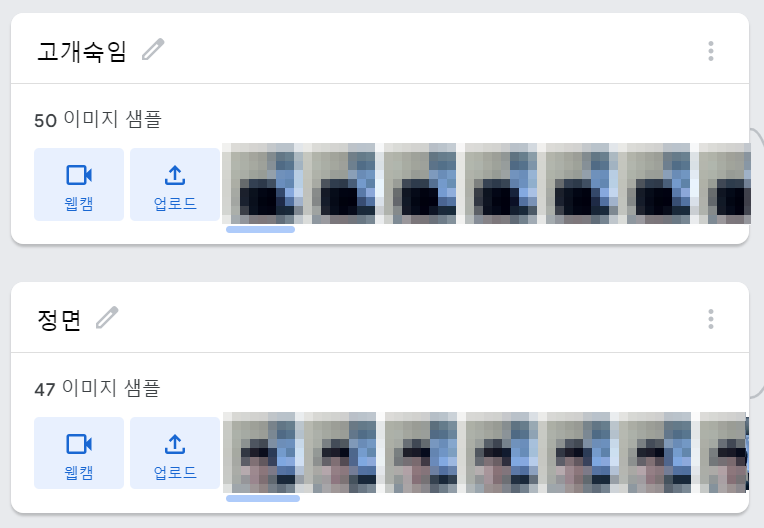  

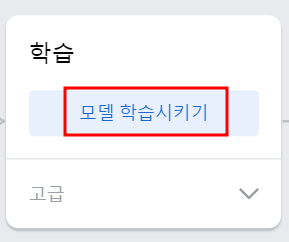  

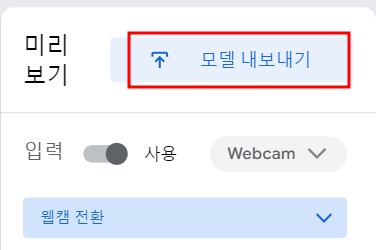  

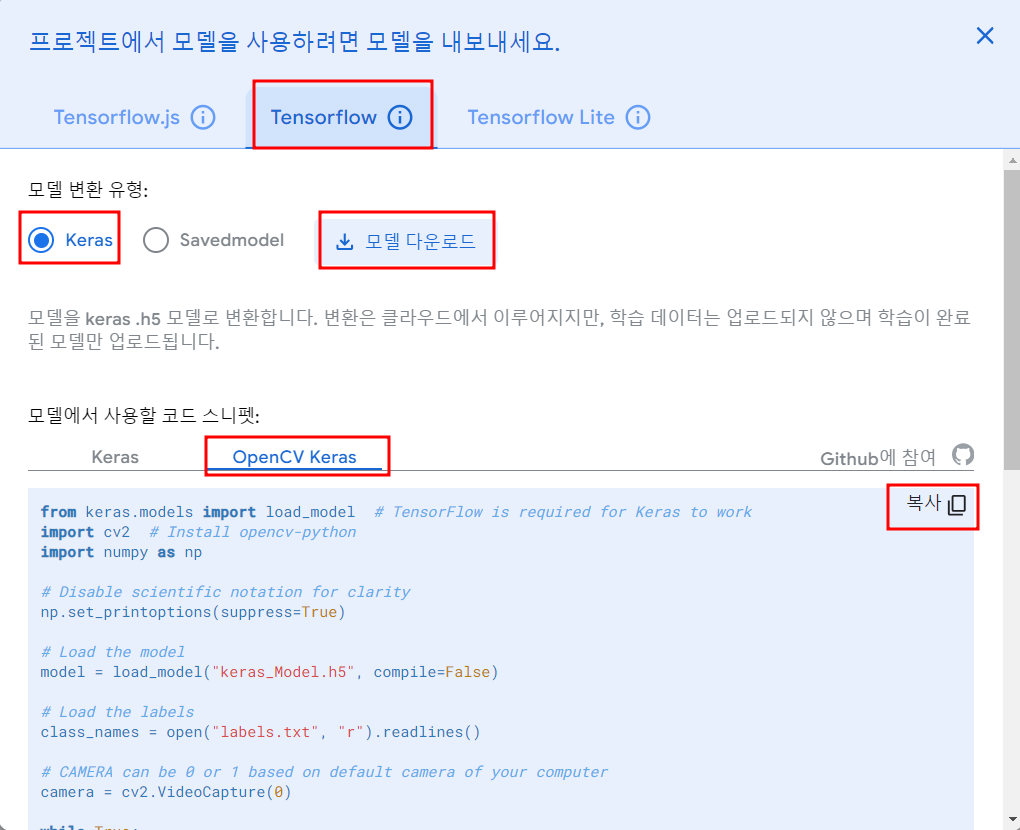

다운받은 압축 폴더 압축 해제 후 파일을 ipynb 파일과 같은 폴더로 이동  
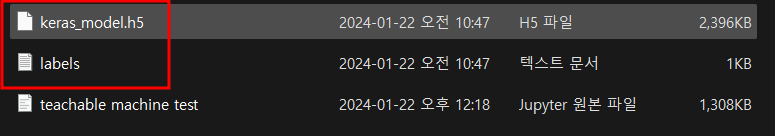  
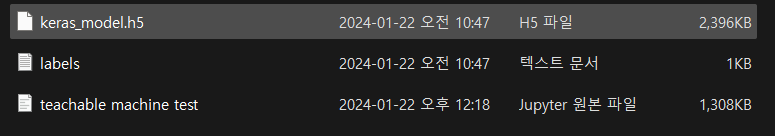

가상환경 설정  
python 3.7.12

pip install tensorflow-cpu

In [2]:
from keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_Model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# CAMERA can be 0 or 1 based on default camera of your computer
camera = cv2.VideoCapture(0)

while True:
    # Grab the webcamera's image.
    ret, image = camera.read()

    # Resize the raw image into (224-height,224-width) pixels
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)

    # Show the image in a window
    cv2.imshow("Webcam Image", image)

    # Make the image a numpy array and reshape it to the models input shape.
    image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)

    # Normalize the image array
    image = (image / 127.5) - 1  # 정규화

    # Predicts the model
    prediction = model.predict(image)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    # Print prediction and confidence score
    print("Class:", class_name[2:], end="")
    print("Confidence Score:", str(np.round(confidence_score * 100))[:-2], "%")

    # Listen to the keyboard for presses.
    keyboard_input = cv2.waitKey(1)

    # 27 is the ASCII for the esc key on your keyboard.
    if keyboard_input == 27:
        break

camera.release()
cv2.destroyAllWindows()


1/1 [==============================] - 1s 715ms/step
Class: 정면
Confidence Score: 99 %
1/1 [==============================] - 0s 32ms/step
Class: 정면
Confidence Score: 100 %
1/1 [==============================] - 0s 28ms/step
Class: 정면
Confidence Score: 98 %
1/1 [==============================] - 0s 30ms/step
Class: 정면
Confidence Score: 98 %
1/1 [==============================] - 0s 29ms/step
Class: 정면
Confidence Score: 95 %
1/1 [==============================] - 0s 31ms/step
Class: 정면
Confidence Score: 97 %
1/1 [==============================] - 0s 31ms/step
Class: 정면
Confidence Score: 96 %
1/1 [==============================] - 0s 26ms/step
Class: 정면
Confidence Score: 97 %
1/1 [==============================] - 0s 29ms/step
Class: 정면
Confidence Score: 98 %
1/1 [==============================] - 0s 28ms/step
Class: 정면
Confidence Score: 97 %
1/1 [==============================] - 0s 30ms/step
Class: 정면
Confidence Score: 99 %
1/1 [==============================] - 0s 28ms/step
Class: 정면
C

In [10]:
class_Name = ['ㅁ', 'ㄱ', 'ㅇ']  # 티처블머신러닝에서 만든 레이블 이름 (고개숙임, 정면, 잠)
# 학습할 때부터 ㅁ은 [1, 0, 0]으로 학습하고
# ㄱ은 [0, 1, 0] 
# ㅇ은 [0, 0, 1]로 학습하는 원핫인코딩 기법을 진행함
import numpy as np
model_pred = [0.3, 0.2, 0.5]  # 웹캠화면에서 받아들인 사진을 모델에서 인식한 각 값의 확률, 고개 숙임은 0.3, 정면은 0.2, 잠은 0.5
a = np.argmax(model_pred)  # 모델에서 인식한 각 확률 중에 가장 큰 확률값의 위치 넘버를 갖고 옴

class_Name[a]  # 가장 큰 위치의 레이블을 출력

'ㅇ'

In [4]:
model = load_model("keras_Model.h5", compile=False)
model.get_weights()

[array([[[[ 0.05361931, -0.02892906, -0.16148745, -0.        ,
            0.18596345,  0.        ,  0.09809145,  0.        ,
           -0.0422909 , -0.1392914 , -0.04407115,  0.        ,
           -0.17437002,  0.        , -0.06136873,  0.03370535],
          [ 0.10985204,  0.00588378, -0.27964717, -0.        ,
            0.41337186, -0.        , -0.0304018 , -0.        ,
           -0.05426199,  0.24165802,  0.15748855, -0.        ,
           -0.30768207,  0.        , -0.10804561,  0.08846362],
          [ 0.03315235, -0.07772702, -0.07099956, -0.        ,
            0.10532657, -0.        , -0.08293523, -0.        ,
           -0.00877229,  0.03973385, -0.10944241,  0.        ,
           -0.09973272, -0.        , -0.00281646,  0.01240061]],
 
         [[-0.24111664,  0.05638118, -0.22694921, -0.        ,
           -0.17620747,  0.        ,  0.37251797,  0.        ,
           -0.01284248, -0.0618528 , -0.24837749,  0.        ,
           -0.2503941 ,  0.        ,  0.21041584,